# Introduction
This exploratory data analysis (EDA) aims to examine the Medical Insurance dataset to understand the key factors influencing insurance charges. The dataset includes demographic and health-related variables such as age, BMI, smoking status, number of children, and region. The objective of this analysis is to identify patterns, relationships, and potential predictors of medical expenses.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Loading Data

In [6]:
df = pd.read_csv("/kaggle/input/datasets/mosapabdelghany/medical-insurance-cost-dataset/insurance.csv")

# Data types of columns

In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

The data type inspection shows that all columns are stored in appropriate formats. Numerical variables such as age, BMI, children, and charges are correctly identified as numeric types, while categorical variables such as sex, smoker, and region are stored as object types.
Therefore, no data type corrections are required, indicating that the dataset is clean and well-structured for further analysis.

# Check missing values

In [8]:
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


The dataset does not contain any missing values. Therefore, no imputation or removal of records is required

# Check duplicate rows

In [9]:
df.duplicated().sum()

np.int64(1)

In [13]:
df = df.drop_duplicates()

In [14]:
df.duplicated().sum()

np.int64(0)

After removing the duplicate record, the dataset contains no repeated observations. This ensures that each row represents a unique individual and prevents bias in the analysis.

# Number of rows and columns

In [15]:
# finding number of rows and columns
print("Shape (rows, columns):", df.shape)
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Shape (rows, columns): (1337, 7)
Number of rows: 1337
Number of columns: 7


The dataset consists of 1,337 rows and 7 columns. This size is appropriate for exploratory data analysis, providing sufficient observations for meaningful insights while remaining computationally efficient.

# Describtive Summary Statistics

In [16]:
# statistical summary
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


The descriptive statistics show that the average age of individuals is approximately 39 years, with a minimum of 18 and a maximum of 64. The average BMI is around 30.66, indicating that many individuals fall into the overweight category.

The average insurance charge is approximately 13,279, with a minimum of 1,121 and a maximum of 63,770. The large difference between the minimum and maximum values, along with a high standard deviation (12,110), suggests significant variability in medical expenses.

Additionally, the median charge (9,386) is lower than the mean, indicating that the distribution of charges is positively skewed, with some individuals incurring very high medical costs.

# Univariate Analysis

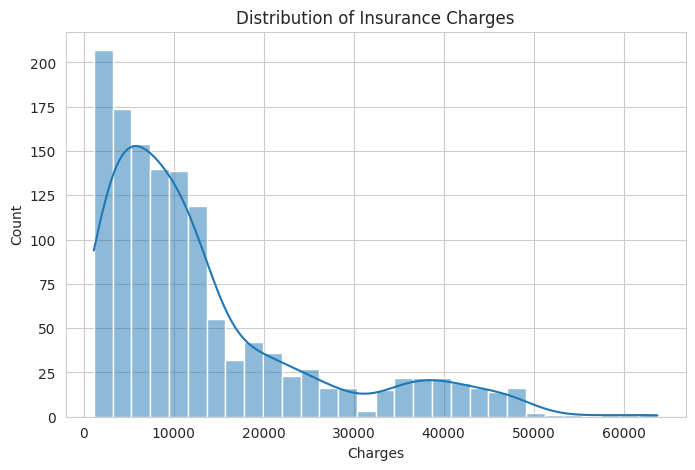

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(df["charges"], bins=30, kde=True)
plt.title("Distribution of Insurance Charges")
plt.xlabel("Charges")
plt.ylabel("Count")
plt.show()

The distribution of insurance charges is positively skewed. Most individuals incur relatively low to moderate medical expenses, while a small number of individuals have significantly high charges, creating a long right tail.

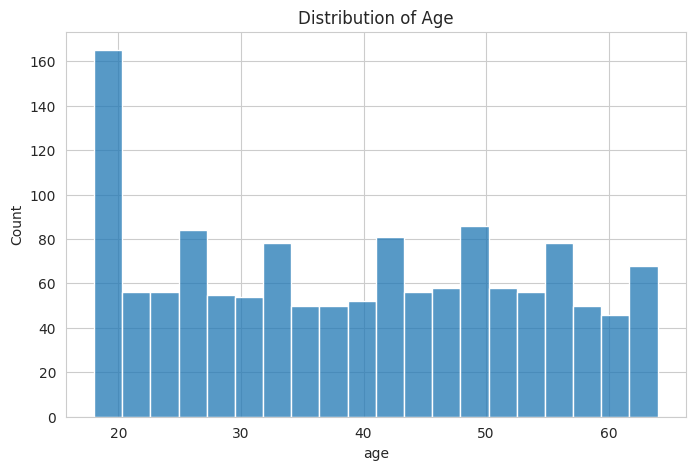

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(df["age"], bins=20)
plt.title("Distribution of Age")
plt.show()

The age distribution appears relatively uniform across the adult age range (18–64 years), with slightly higher frequencies among younger individuals. There is no strong skewness observed, indicating that the dataset contains a fairly balanced representation of different age groups.

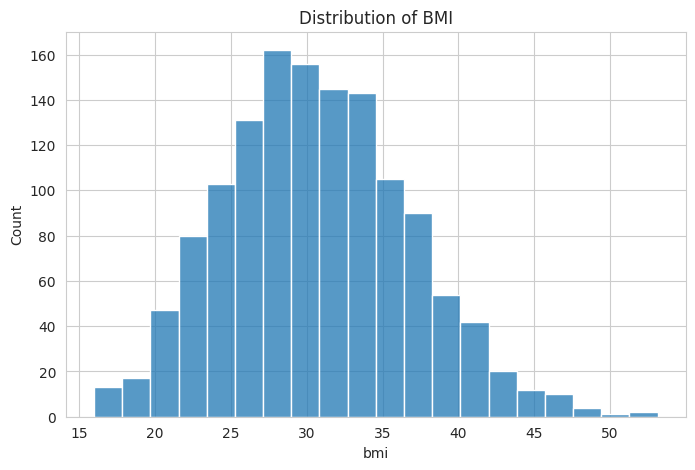

In [19]:
plt.figure(figsize=(8,5))
sns.histplot(df["bmi"], bins=20)
plt.title("Distribution of BMI")
plt.show()

The BMI distribution is slightly right-skewed, with most individuals concentrated between 25 and 35. The peak appears around the high-20s to low-30s range, indicating that a large portion of the population falls within the overweight category. A small number of individuals have significantly higher BMI values, creating a mild right tail in the distribution.

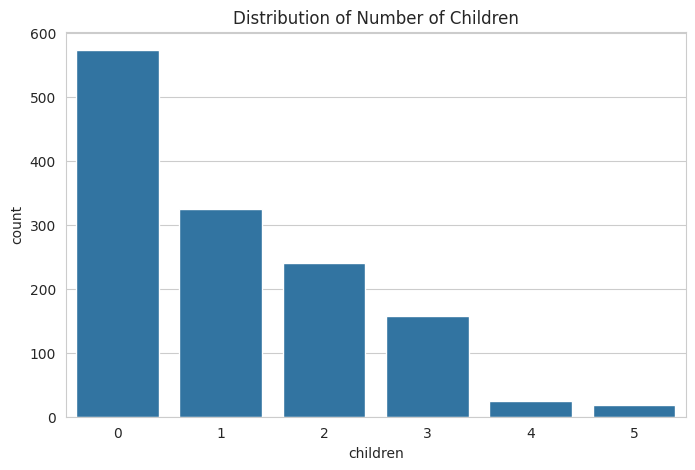

In [20]:
plt.figure(figsize=(8,5))
sns.countplot(x=df["children"])
plt.title("Distribution of Number of Children")
plt.show()

The distribution of the number of children is highly right-skewed. Most individuals have no children, followed by one or two children. Very few individuals have four or five children. This indicates that larger family sizes are relatively uncommon in the dataset.

# Bivariate Analysis

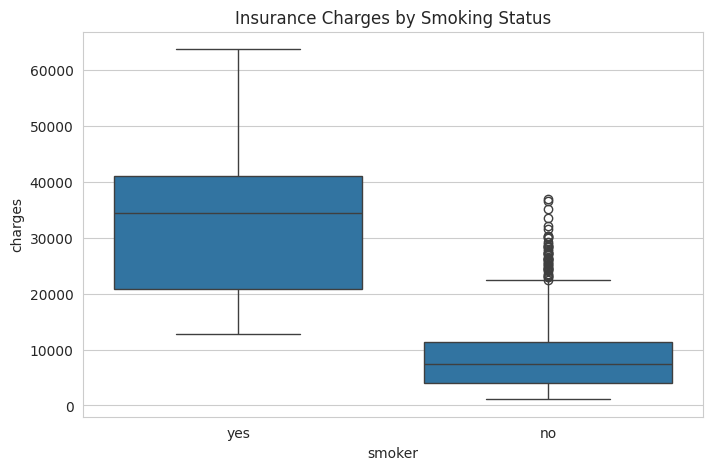

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(x="smoker", y="charges", data=df)
plt.title("Insurance Charges by Smoking Status")
plt.show()

The boxplot clearly shows that smokers incur significantly higher insurance charges compared to non-smokers. Smoking appears to be a major factor influencing medical expenses.

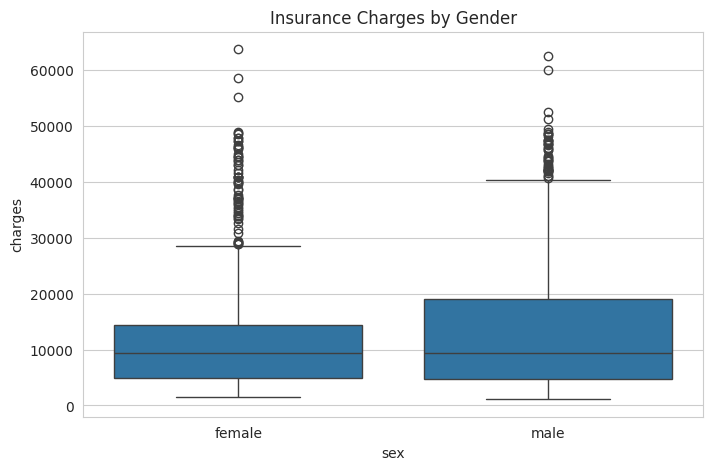

In [22]:
plt.figure(figsize=(8,5))
sns.boxplot(x="sex", y="charges", data=df)
plt.title("Insurance Charges by Gender")
plt.show()

The boxplot shows that insurance charges are fairly similar between males and females. The median values are nearly equal, indicating that gender does not significantly influence medical expenses. Although males show slightly greater variability, the overall difference between the two groups is minimal.

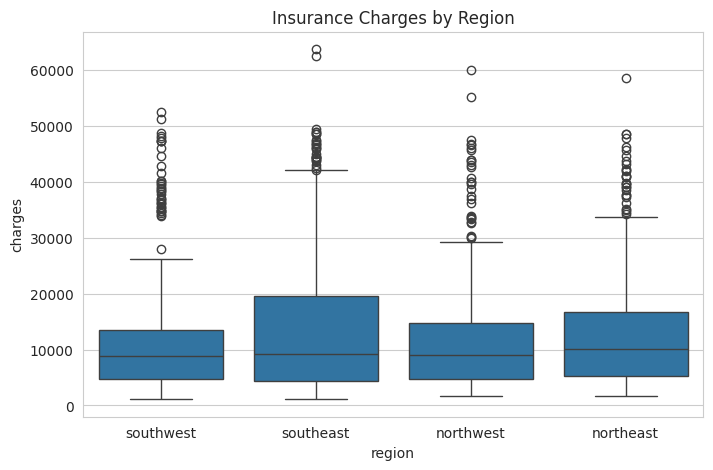

In [23]:
plt.figure(figsize=(8,5))
sns.boxplot(x="region", y="charges", data=df)
plt.title("Insurance Charges by Region")
plt.show()

The boxplot indicates that insurance charges are relatively similar across different regions. While the Southeast region shows slightly higher variability and some extreme values, the median charges across regions are fairly comparable. This suggests that region does not have a strong impact on medical insurance costs.

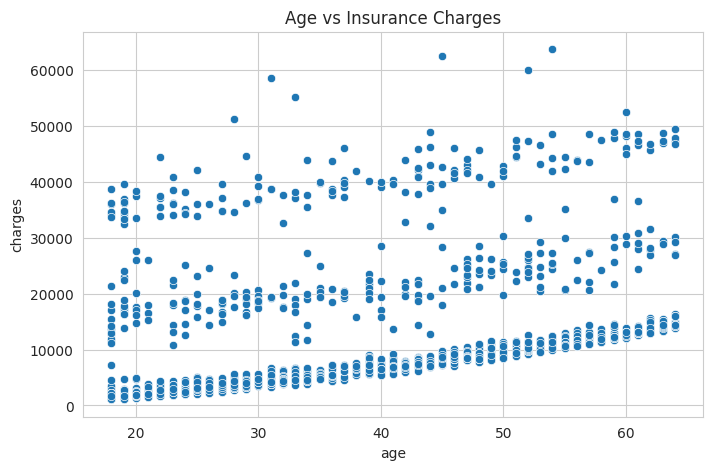

In [24]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="age", y="charges", data=df)
plt.title("Age vs Insurance Charges")
plt.show()

The scatter plot shows a positive relationship between age and insurance charges. As age increases, medical expenses tend to increase as well. However, the spread of points suggests that other factors, such as smoking status, also significantly influence charges.

# Multivariate Analysis

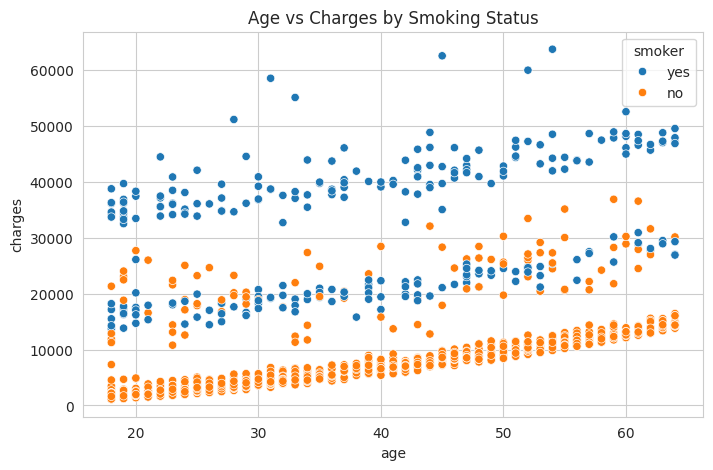

In [26]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="age", y="charges", hue="smoker", data=df)
plt.title("Age vs Charges by Smoking Status")
plt.show()

The multivariate scatter plot clearly shows that smoking status significantly impacts insurance charges. Smokers consistently have much higher medical expenses across all age groups. Additionally, charges tend to increase with age for both smokers and non-smokers, but the effect is substantially stronger among smokers.

# Correlation Matrix

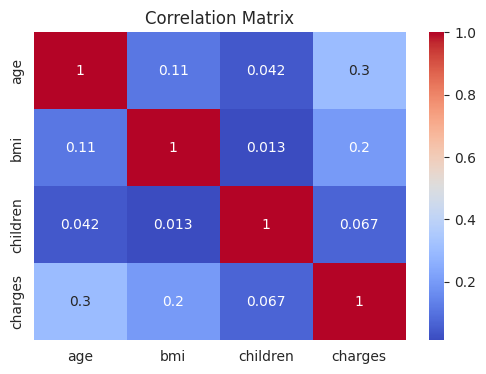

In [25]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

The correlation matrix indicates a moderate positive relationship between age and insurance charges (0.30). BMI shows a weaker positive correlation (0.20), while the number of children has minimal impact on charges. Overall, age appears to be the most influential numerical variable affecting medical costs.

# Conclusion
The exploratory data analysis revealed that smoking is the most significant factor affecting insurance charges. Age and BMI also contribute to increased medical costs, while region and gender have relatively minor influence. The dataset is clean and well-structured, making it suitable for further predictive modeling.